<a href="https://colab.research.google.com/github/anumondal1/Amazon-Customer-Segmentation/blob/main/6211_Final_Project_Clust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSBA 6211 Group Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv("Amazon Customer Behavior Survey.csv")
df.head(3)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy


In [ ]:
#Check for missing values
df.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [ ]:
df = df.drop(columns=["Purchase_Categories", "Timestamp", "Personalized_Recommendation_Frequency" ])

Handling Missing Values

In [ ]:
# Impute missing values with the most frequent value
most_common_method = df['Product_Search_Method'].mode()[0]
df['Product_Search_Method'].fillna(most_common_method, inplace=True)
df.isna().sum()

Age                                   0
Gender                                0
Purchase_Frequency                    0
Browsing_Frequency                    0
Product_Search_Method                 0
Search_Result_Exploration             0
Customer_Reviews_Importance           0
Add_to_Cart_Browsing                  0
Cart_Completion_Frequency             0
Cart_Abandonment_Factors              0
Saveforlater_Frequency                0
Review_Left                           0
Review_Reliability                    0
Review_Helpfulness                    0
Personalized_Recommendation_Rating    0
Recommendation_Helpfulness            0
Rating_Accuracy                       0
Shopping_Satisfaction                 0
Service_Appreciation                  0
Improvement_Areas                     0
dtype: int64

In [ ]:
# Renaming the columns to avoid confusion
df.rename(columns= {"age":"Age", "Rating_Accuracy ": "Rating_Accuracy", 'Personalized_Recommendation_Frequency ': 'Personalized_Recommendation_Rating'}, inplace = True)
# Checking the column names after renaming
df.columns


Index(['Age', 'Gender', 'Purchase_Frequency', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Customer_Reviews_Importance', 'Add_to_Cart_Browsing',
       'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Personalized_Recommendation_Rating',
       'Recommendation_Helpfulness', 'Rating_Accuracy',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas'],
      dtype='object')

In [ ]:
df.describe()

,Age,Customer_Reviews_Importance,Personalized_Recommendation_Rating,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


Converting Categorical Data to Numerical

In [ ]:
# One-hot encoding categorical variables
categorical_variables = ['Gender', 'Purchase_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Recommendation_Helpfulness', 'Service_Appreciation', 'Improvement_Areas']
data_encoded = pd.get_dummies(df, columns=categorical_variables, dtype="int")


In [ ]:
data_encoded.head(3)

,Age,Customer_Reviews_Importance,Personalized_Recommendation_Rating,Rating_Accuracy,Shopping_Satisfaction,Gender_Female,Gender_Male,Gender_Others,Gender_Prefer not to say,Purchase_Frequency_Few times a month,Purchase_Frequency_Less than once a month,Purchase_Frequency_Multiple times a week,Purchase_Frequency_Once a month,Purchase_Frequency_Once a week,Browsing_Frequency_Few times a month,Browsing_Frequency_Few times a week,Browsing_Frequency_Multiple times a day,Browsing_Frequency_Rarely,Product_Search_Method_Filter,Product_Search_Method_Keyword,Product_Search_Method_categories,Product_Search_Method_others,Search_Result_Exploration_First page,Search_Result_Exploration_Multiple pages,Add_to_Cart_Browsing_Maybe,Add_to_Cart_Browsing_No,Add_to_Cart_Browsing_Yes,Cart_Completion_Frequency_Always,Cart_Completion_Frequency_Never,Cart_Completion_Frequency_Often,Cart_Completion_Frequency_Rarely,Cart_Completion_Frequency_Sometimes,Cart_Abandonment_Factors_Changed my mind or no longer need the item,Cart_Abandonment_Factors_Found a better price elsewhere,Cart_Abandonment_Factors_High shipping costs,Cart_Abandonment_Factors_others,Saveforlater_Frequency_Always,Saveforlater_Frequency_Never,Saveforlater_Frequency_Often,Saveforlater_Frequency_Rarely,Saveforlater_Frequency_Sometimes,Review_Left_No,Review_Left_Yes,Review_Reliability_Heavily,Review_Reliability_Moderately,Review_Reliability_Never,Review_Reliability_Occasionally,Review_Reliability_Rarely,Review_Helpfulness_No,Review_Helpfulness_Sometimes,Review_Helpfulness_Yes,Recommendation_Helpfulness_No,Recommendation_Helpfulness_Sometimes,Recommendation_Helpfulness_Yes,Service_Appreciation_.,Service_Appreciation_All the above,Service_Appreciation_Competitive prices,Service_Appreciation_Customer service,Service_Appreciation_Customer service,Service_Appreciation_Product recommendations,Service_Appreciation_Quick delivery,Service_Appreciation_User-friendly website/app interface,Service_Appreciation_Wide product selection,Improvement_Areas_.,Improvement_Areas_Add more familiar brands to the list,Improvement_Areas_Customer service responsiveness,Improvement_Areas_I don't have any problem with Amazon,Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues,Improvement_Areas_Irrelevant product suggestions,Improvement_Areas_Nil,Improvement_Areas_No problems with Amazon,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges
0,23,1,2,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,23,1,2,3,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,24,2,4,3,3,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Filter only numeric columns, especially binary ones if necessary
numeric_data = data_encoded.select_dtypes(include=[np.number])

In [ ]:
# Generate a correlation matrix and identify highly correlated variables initially
correlation_matrix = numeric_data.corr()
initial_high_corr_vars = np.where(np.abs(correlation_matrix) > 0.8)
initial_high_corr_vars = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) for x, y in zip(*initial_high_corr_vars) if x != y and x < y]
print("Initially identified highly correlated variables:", initial_high_corr_vars)



Initially identified highly correlated variables: [('Search_Result_Exploration_First page', 'Search_Result_Exploration_Multiple pages'), ('Review_Left_No', 'Review_Left_Yes'), ('Service_Appreciation_.', 'Improvement_Areas_.'), ('Service_Appreciation_Customer service', 'Improvement_Areas_Nothing')]


In [ ]:
# Drop highly correlated columns based on initial analysis
numeric_data.drop(columns=['Search_Result_Exploration_Multiple pages', 'Review_Left_No', 'Service_Appreciation_.', 'Improvement_Areas_.'], inplace=True)


In [ ]:
# Recalculate the correlation matrix to confirm the changes
new_correlation_matrix = numeric_data.corr()
new_high_corr_vars = np.where(np.abs(new_correlation_matrix) > 0.8)
ew_high_corr_vars = [(new_correlation_matrix.columns[x], new_correlation_matrix.columns[y]) for x, y in zip(*new_high_corr_vars) if x != y and x < y]
print("Remaining highly correlated variables after adjustments:", new_high_corr_vars)


Remaining highly correlated variables after adjustments: [('Service_Appreciation_Customer service', 'Improvement_Areas_Nothing')]


This pair suggests that when customers appreciate the customer service, they also tend to report nothing to improve. Given that these insights are somewhat different in nature (one is positive feedback, the other is lack of negative feedback), we want to keep both.

In [ ]:
# Correcting the age filtering
reasonable_age_threshold = 12  # Assuming customers younger than this might be outliers
data_encoded = data_encoded[data_encoded['Age'] >= reasonable_age_threshold]

In [ ]:
data_encoded.head(3)

,Age,Customer_Reviews_Importance,Personalized_Recommendation_Rating,Rating_Accuracy,Shopping_Satisfaction,Gender_Female,Gender_Male,Gender_Others,Gender_Prefer not to say,Purchase_Frequency_Few times a month,Purchase_Frequency_Less than once a month,Purchase_Frequency_Multiple times a week,Purchase_Frequency_Once a month,Purchase_Frequency_Once a week,Browsing_Frequency_Few times a month,Browsing_Frequency_Few times a week,Browsing_Frequency_Multiple times a day,Browsing_Frequency_Rarely,Product_Search_Method_Filter,Product_Search_Method_Keyword,Product_Search_Method_categories,Product_Search_Method_others,Search_Result_Exploration_First page,Search_Result_Exploration_Multiple pages,Add_to_Cart_Browsing_Maybe,Add_to_Cart_Browsing_No,Add_to_Cart_Browsing_Yes,Cart_Completion_Frequency_Always,Cart_Completion_Frequency_Never,Cart_Completion_Frequency_Often,Cart_Completion_Frequency_Rarely,Cart_Completion_Frequency_Sometimes,Cart_Abandonment_Factors_Changed my mind or no longer need the item,Cart_Abandonment_Factors_Found a better price elsewhere,Cart_Abandonment_Factors_High shipping costs,Cart_Abandonment_Factors_others,Saveforlater_Frequency_Always,Saveforlater_Frequency_Never,Saveforlater_Frequency_Often,Saveforlater_Frequency_Rarely,Saveforlater_Frequency_Sometimes,Review_Left_No,Review_Left_Yes,Review_Reliability_Heavily,Review_Reliability_Moderately,Review_Reliability_Never,Review_Reliability_Occasionally,Review_Reliability_Rarely,Review_Helpfulness_No,Review_Helpfulness_Sometimes,Review_Helpfulness_Yes,Recommendation_Helpfulness_No,Recommendation_Helpfulness_Sometimes,Recommendation_Helpfulness_Yes,Service_Appreciation_.,Service_Appreciation_All the above,Service_Appreciation_Competitive prices,Service_Appreciation_Customer service,Service_Appreciation_Customer service,Service_Appreciation_Product recommendations,Service_Appreciation_Quick delivery,Service_Appreciation_User-friendly website/app interface,Service_Appreciation_Wide product selection,Improvement_Areas_.,Improvement_Areas_Add more familiar brands to the list,Improvement_Areas_Customer service responsiveness,Improvement_Areas_I don't have any problem with Amazon,Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues,Improvement_Areas_Irrelevant product suggestions,Improvement_Areas_Nil,Improvement_Areas_No problems with Amazon,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges
0,23,1,2,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,23,1,2,3,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,24,2,4,3,3,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


**Normalization/Standardization**.  
Age and Customer Ratings: These columns (Age, Customer_Reviews_Importance, Personalized_Recommendation_Rating, Rating_Accuracy, Shopping_Satisfaction) are not binary and exhibit varying ranges and standard deviations. Standardizing these to have a mean of 0 and a standard deviation of 1 could be beneficial, especially since K-means relies on distances, making scales important.

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()
data_for_clustering = scaler.fit_transform(data_encoded)  # This will scale all features


In [ ]:
data_encoded.head()

,Age,Customer_Reviews_Importance,Personalized_Recommendation_Rating,Rating_Accuracy,Shopping_Satisfaction,Gender_Female,Gender_Male,Gender_Others,Gender_Prefer not to say,Purchase_Frequency_Few times a month,Purchase_Frequency_Less than once a month,Purchase_Frequency_Multiple times a week,Purchase_Frequency_Once a month,Purchase_Frequency_Once a week,Browsing_Frequency_Few times a month,Browsing_Frequency_Few times a week,Browsing_Frequency_Multiple times a day,Browsing_Frequency_Rarely,Product_Search_Method_Filter,Product_Search_Method_Keyword,Product_Search_Method_categories,Product_Search_Method_others,Search_Result_Exploration_First page,Search_Result_Exploration_Multiple pages,Add_to_Cart_Browsing_Maybe,Add_to_Cart_Browsing_No,Add_to_Cart_Browsing_Yes,Cart_Completion_Frequency_Always,Cart_Completion_Frequency_Never,Cart_Completion_Frequency_Often,Cart_Completion_Frequency_Rarely,Cart_Completion_Frequency_Sometimes,Cart_Abandonment_Factors_Changed my mind or no longer need the item,Cart_Abandonment_Factors_Found a better price elsewhere,Cart_Abandonment_Factors_High shipping costs,Cart_Abandonment_Factors_others,Saveforlater_Frequency_Always,Saveforlater_Frequency_Never,Saveforlater_Frequency_Often,Saveforlater_Frequency_Rarely,Saveforlater_Frequency_Sometimes,Review_Left_No,Review_Left_Yes,Review_Reliability_Heavily,Review_Reliability_Moderately,Review_Reliability_Never,Review_Reliability_Occasionally,Review_Reliability_Rarely,Review_Helpfulness_No,Review_Helpfulness_Sometimes,Review_Helpfulness_Yes,Recommendation_Helpfulness_No,Recommendation_Helpfulness_Sometimes,Recommendation_Helpfulness_Yes,Service_Appreciation_.,Service_Appreciation_All the above,Service_Appreciation_Competitive prices,Service_Appreciation_Customer service,Service_Appreciation_Customer service,Service_Appreciation_Product recommendations,Service_Appreciation_Quick delivery,Service_Appreciation_User-friendly website/app interface,Service_Appreciation_Wide product selection,Improvement_Areas_.,Improvement_Areas_Add more familiar brands to the list,Improvement_Areas_Customer service responsiveness,Improvement_Areas_I don't have any problem with Amazon,Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues,Improvement_Areas_Irrelevant product suggestions,Improvement_Areas_Nil,Improvement_Areas_No problems with Amazon,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges
0,23,1,2,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,23,1,2,3,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,24,2,4,3,3,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,24,5,3,3,4,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,22,1,4,2,2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


###K-means Clustering:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

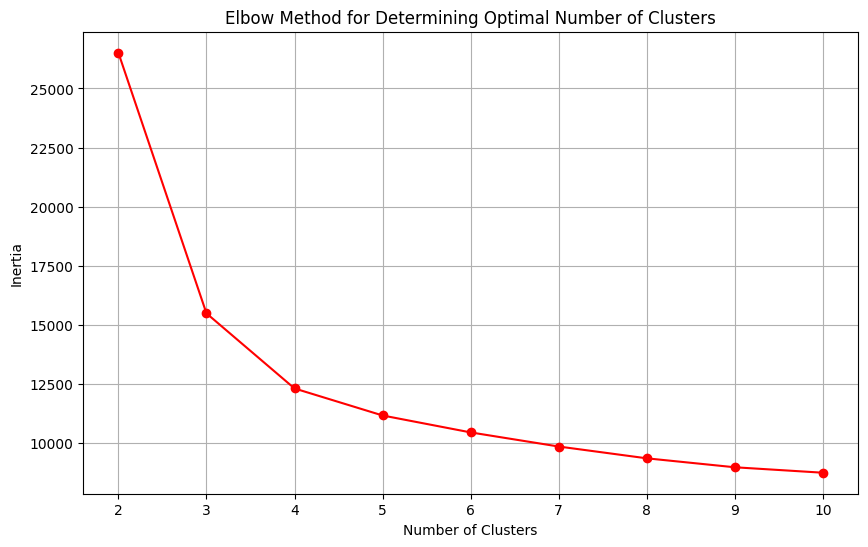

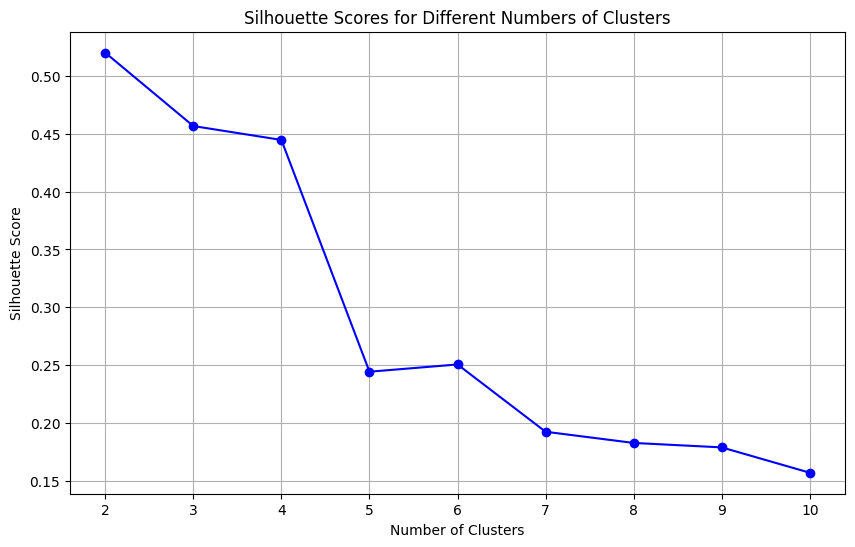

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'data_encoded' is your DataFrame ready for clustering
data_for_clustering = data_encoded  # Update this if your DataFrame name differs

# Variables to store results for plotting
inertia = []
silhouette_scores = []

# Testing cluster sizes from 2 to 10 (Silhouette score is not defined for k=1)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_for_clustering)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_for_clustering, cluster_labels))

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o', color='red')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='blue')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Determine the Number of Clusters Using the Elbow Method

In [ ]:
from sklearn.cluster import KMeans

# Specify the number of clusters
k = 3

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(data_for_clustering)

# Retrieve the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column to your DataFrame
data_encoded['Cluster'] = cluster_labels

# Display the first few entries of your DataFrame to confirm the labels are added
data_encoded.head()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Customer_Reviews_Importance,Personalized_Recommendation_Rating,Rating_Accuracy,Shopping_Satisfaction,Gender_Female,Gender_Male,Gender_Others,Gender_Prefer not to say,Purchase_Frequency_Few times a month,Purchase_Frequency_Less than once a month,Purchase_Frequency_Multiple times a week,Purchase_Frequency_Once a month,Purchase_Frequency_Once a week,Browsing_Frequency_Few times a month,Browsing_Frequency_Few times a week,Browsing_Frequency_Multiple times a day,Browsing_Frequency_Rarely,Product_Search_Method_Filter,Product_Search_Method_Keyword,Product_Search_Method_categories,Product_Search_Method_others,Search_Result_Exploration_First page,Search_Result_Exploration_Multiple pages,Add_to_Cart_Browsing_Maybe,Add_to_Cart_Browsing_No,Add_to_Cart_Browsing_Yes,Cart_Completion_Frequency_Always,Cart_Completion_Frequency_Never,Cart_Completion_Frequency_Often,Cart_Completion_Frequency_Rarely,Cart_Completion_Frequency_Sometimes,Cart_Abandonment_Factors_Changed my mind or no longer need the item,Cart_Abandonment_Factors_Found a better price elsewhere,Cart_Abandonment_Factors_High shipping costs,Cart_Abandonment_Factors_others,Saveforlater_Frequency_Always,Saveforlater_Frequency_Never,Saveforlater_Frequency_Often,Saveforlater_Frequency_Rarely,Saveforlater_Frequency_Sometimes,Review_Left_No,Review_Left_Yes,Review_Reliability_Heavily,Review_Reliability_Moderately,Review_Reliability_Never,Review_Reliability_Occasionally,Review_Reliability_Rarely,Review_Helpfulness_No,Review_Helpfulness_Sometimes,Review_Helpfulness_Yes,Recommendation_Helpfulness_No,Recommendation_Helpfulness_Sometimes,Recommendation_Helpfulness_Yes,Service_Appreciation_.,Service_Appreciation_All the above,Service_Appreciation_Competitive prices,Service_Appreciation_Customer service,Service_Appreciation_Customer service,Service_Appreciation_Product recommendations,Service_Appreciation_Quick delivery,Service_Appreciation_User-friendly website/app interface,Service_Appreciation_Wide product selection,Improvement_Areas_.,Improvement_Areas_Add more familiar brands to the list,Improvement_Areas_Customer service responsiveness,Improvement_Areas_I don't have any problem with Amazon,Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues,Improvement_Areas_Irrelevant product suggestions,Improvement_Areas_Nil,Improvement_Areas_No problems with Amazon,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges,Cluster
0,23,1,2,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
1,23,1,2,3,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
2,24,2,4,3,3,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
3,24,5,3,3,4,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
4,22,1,4,2,2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2


In [ ]:
# Analyzing the clusters
# You might want to look at the centroid values and see how the clusters differ
centroids = kmeans.cluster_centers_
print("Centroids of the clusters:")
print(centroids)



Centroids of the clusters:
[[ 4.86952381e+01  2.65714286e+00  2.68571429e+00  2.71428571e+00
   2.51428571e+00  5.04761905e-01  2.66666667e-01  3.80952381e-02
   1.90476190e-01  4.28571429e-01  1.61904762e-01  1.14285714e-01
   1.04761905e-01  1.90476190e-01  2.57142857e-01  4.19047619e-01
   1.71428571e-01  1.52380952e-01  2.47619048e-01  3.04761905e-01
   3.80952381e-01  6.66666667e-02  2.85714286e-01  7.14285714e-01
   5.04761905e-01  2.66666667e-01  2.28571429e-01  1.14285714e-01
   5.71428571e-02  2.09523810e-01  1.33333333e-01  4.85714286e-01
   4.09523810e-01  4.00000000e-01  1.23809524e-01  6.66666667e-02
   9.52380952e-02  7.61904762e-02  2.38095238e-01  1.23809524e-01
   4.66666667e-01  4.28571429e-01  5.71428571e-01  1.42857143e-01
   3.52380952e-01  4.76190476e-02  3.80952381e-01  7.61904762e-02
   2.76190476e-01  4.57142857e-01  2.66666667e-01  2.57142857e-01
   5.04761905e-01  2.38095238e-01  8.67361738e-19  8.67361738e-19
   3.42857143e-01  8.67361738e-19  8.67361738e-19

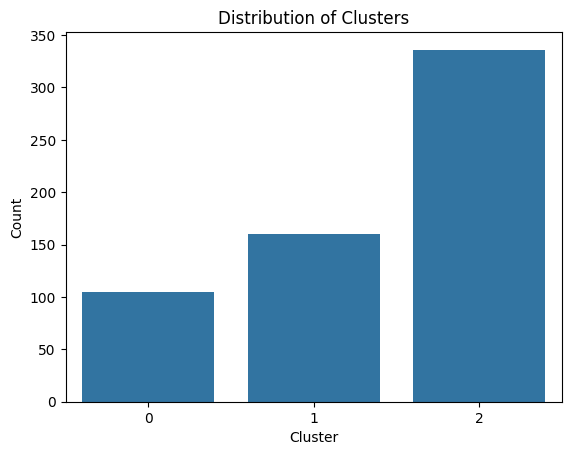

Mean values in each cluster:
               Age  Customer_Reviews_Importance  \
Cluster                                           
0        48.695238                     2.657143   
1        34.756250                     2.575000   
2        23.389881                     2.377976   

         Personalized_Recommendation_Rating  Rating_Accuracy  \
Cluster                                                        
0                                  2.685714         2.714286   
1                                  2.631250         2.643750   
2                                  2.735119         2.672619   

         Shopping_Satisfaction  Gender_Female  Gender_Male  Gender_Others  \
Cluster                                                                     
0                     2.514286       0.504762     0.266667       0.038095   
1                     2.393750       0.543750     0.256250       0.037500   
2                     2.482143       0.630952     0.217262       0.026786   

        

In [ ]:
# Optionally, you can also look at the distribution of data points in each cluster
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of clusters
sns.countplot(x='Cluster', data=data_encoded)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Further analysis can include examining the mean values of features within each cluster
cluster_means = data_encoded.groupby('Cluster').mean()
print("Mean values in each cluster:")
print(cluster_means)

Visualization

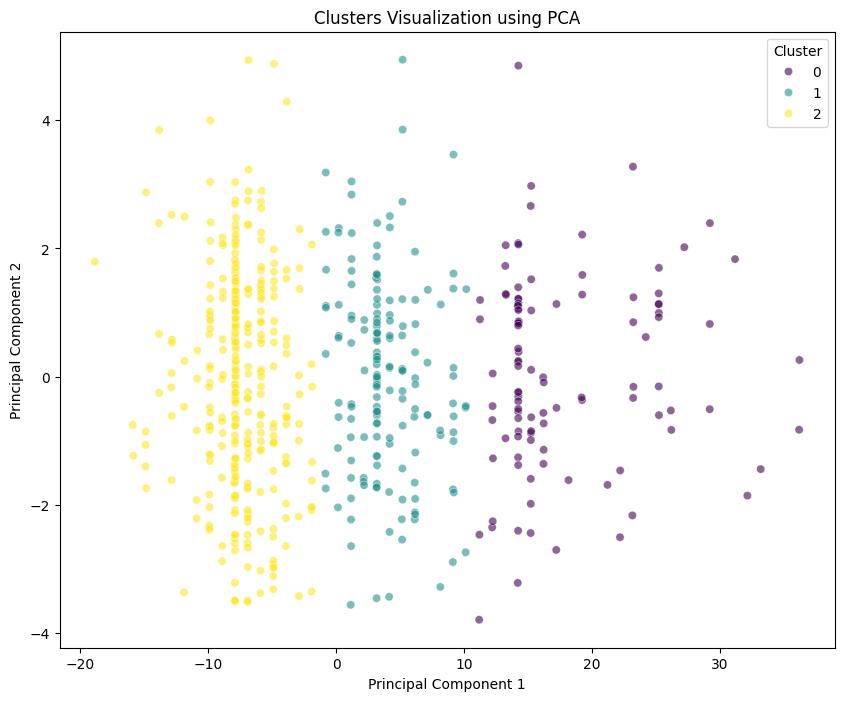

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_for_clustering)

# Create a DataFrame with the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=['Principal Component 1', 'Principal Component 2'])
reduced_df['Cluster'] = cluster_labels  # Add the cluster labels from the K-means model

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=reduced_df, palette='viridis', alpha=0.6)
plt.title('Clusters Visualization using PCA')
plt.show()


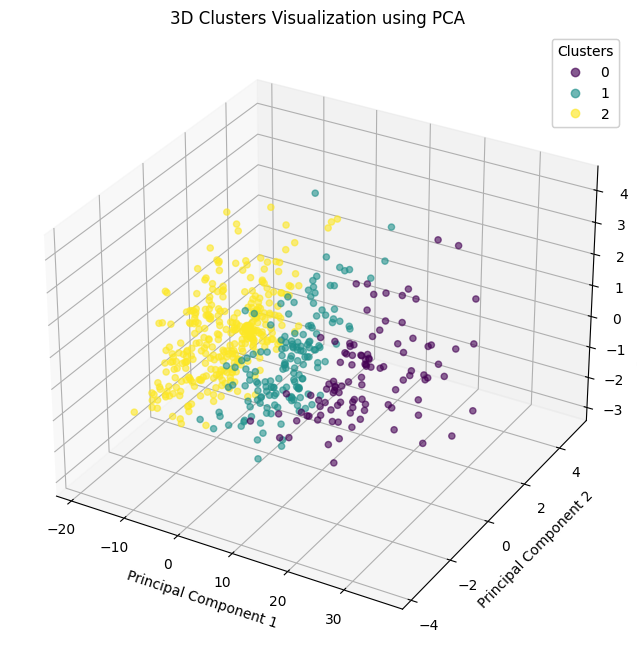

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a PCA model to reduce our data to 3 dimensions for better visualization
pca_3d = PCA(n_components=3)
reduced_data_3d = pca_3d.fit_transform(data_for_clustering)

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2], c=cluster_labels, cmap='viridis', alpha=0.6)

# Legend mapping cluster numbers to colors
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Clusters Visualization using PCA')
plt.show()


**Cluster 0 (Average Age: ~48.7)**.    
**Demographics**: Older demographic, possibly mid to late career or retirees.     
**Behavior:** Moderate in reviews importance, personalized recommendations, and rating accuracy. Moderate shopping satisfaction.      
**Engagement:** Lowest in browsing frequency but uses a variety of product search methods. Moderate add-to-cart and cart completion frequencies.   
**Cluster 1 (Average Age: ~34.8)**.  
**Demographics:** Middle-aged demographic, likely early to mid-career.    
**Behavior:** Similar to Cluster 0 in reviews importance and slightly lower in shopping satisfaction.      
**Engagement:** Highest use of 'Once a week' and 'Multiple times a week' purchase frequencies. Higher engagement in browsing and somewhat higher in cart abandonment for reasons other than costs.    
**Cluster 2 (Average Age: ~23.4)**.     
**Demographics:** Youngest demographic, possibly college students or early career individuals.    
**Behavior:** Highest in personalized recommendation ratings, fairly high in shopping satisfaction.      
**Engagement:** Highest in browsing frequency, product search by keywords, and high add-to-cart browsing 'Yes' responses. Highest completion rates 'Sometimes', suggesting more decisive shopping behavior but also highest cart abandonment due to better prices elsewhere.

Business insights.

For Cluster 0:    
Targeted Marketing: Focus on stability and reliability in marketing communications, emphasizing quality and customer service, as this age group may value these aspects more.     
Loyalty Programs: Introduce or enhance loyalty programs that reward consistent purchasing, as this group shows moderate but steady engagement.

For Cluster 1:     
Engagement Strategies: Deploy more frequent marketing campaigns, as this cluster shows higher weekly engagement. Offers or promotions tied to frequency could be effective.     
Feedback and Interaction: Encourage feedback and interaction through reviews and social media, as this segment is active and may influence others through social platforms.

For Cluster 2:    
Dynamic Pricing and Offers: Provide competitive pricing, flash sales, or discounts, as this group is price-sensitive and actively looks for better prices elsewhere.    
Mobile and App Enhancements: Since this younger demographic likely uses mobile devices heavily, focus on enhancing the mobile app experience, ensuring it is fast, intuitive, and offers personalized recommendations effectively.


Further Analysis
Cross-Sell Opportunities: Analyze purchase patterns within each cluster to identify cross-sell opportunities or bundle deals.    
Customer Journey Analysis: Dive deeper into the customer journey for each cluster to understand and optimize the touchpoints from browsing to purchase.     
These insights can help tailor marketing strategies, product development, and customer service approaches to meet the specific needs and behaviors of each cluster, ultimately enhancing customer satisfaction and loyalty.






